In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
data=pd.read_csv("Phising_Training_Dataset.csv")
data.sample(15)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
4492,16836,1,-1,1,1,1,-1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,1,1,1,1,-1,1,-1,-1,1,0,1,-1
5145,17489,-1,1,1,-1,-1,-1,0,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,0,-1,1,-1,1,1,1,1,1,-1,-1,1,-1
2873,15217,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,1
2280,14624,1,-1,1,1,1,-1,0,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,-1,1,1,1,1,0,1,1
6502,18846,-1,1,-1,1,-1,-1,1,1,-1,1,1,-1,1,1,-1,-1,1,-1,0,1,1,1,1,1,-1,1,-1,-1,1,1,1
2089,14433,-1,1,-1,1,-1,-1,0,0,-1,1,1,-1,1,-1,0,1,1,1,0,1,1,1,1,1,-1,1,-1,1,-1,1,-1
6843,19187,-1,-1,1,-1,1,-1,0,-1,1,1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,1,-1,1,-1,-1,1,1,-1
4490,16834,-1,-1,1,1,1,-1,1,0,-1,1,1,1,1,-1,0,-1,-1,1,0,1,1,1,1,-1,1,-1,-1,1,0,1,-1
6844,19188,-1,-1,1,-1,1,-1,-1,1,-1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,-1,-1,1,0,1,1
7821,20165,-1,-1,1,1,1,-1,-1,1,-1,1,1,-1,1,1,1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,1,1,1


In [3]:
testdata =pd.read_csv("Phising_Testing_Dataset.csv")
testdata.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,1,1,1,1,-1,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,-1,-1,1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1


In [4]:
data.shape

(8955, 32)

## Summary Statistics
#### By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges

In [5]:
data.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,0.623227,0.735343,0.666108,0.191066,-0.076717,-0.118816,-0.595087,0.633054,0.702289,0.113903,0.771301,0.920045,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,0.782084,0.677733,0.745897,0.981632,0.710203,0.761743,0.757789,0.774151,0.711931,0.317711,0.636506,0.391835,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

## Checking NuLL Values

In [7]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int32
 1   having_IP                    8955 non-null   int32
 2   URL_Length                   8955 non-null   int32
 3   Shortining_Service           8955 non-null   int32
 4   having_At_Symbol             8955 non-null   int32
 5   double_slash_redirecting     8955 non-null   int32
 6   Prefix_Suffix                8955 non-null   int32
 7   having_Sub_Domain            8955 non-null   int32
 8   SSLfinal_State               8955 non-null   int32
 9   Domain_registeration_length  8955 non-null   int32
 10  Favicon                      8955 non-null   int32
 11  port                         8955 non-null   int32
 12  HTTPS_token                  8955 non-null   int32
 13  Request_URL                  8955 non-null   int

## Balance/Imbalanced Data
### The data is balanced for non-phising and phising label

<AxesSubplot:>

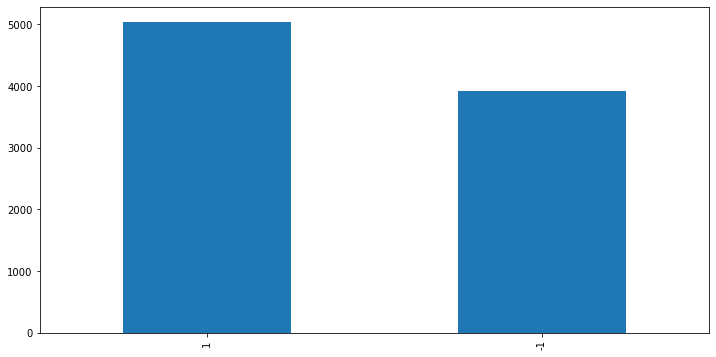

In [8]:
data['Result'].value_counts().plot(kind='bar')

# Spearman Correlation
## By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [9]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['Result']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['Result'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

<ipython-input-9-6f93ffcb15ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


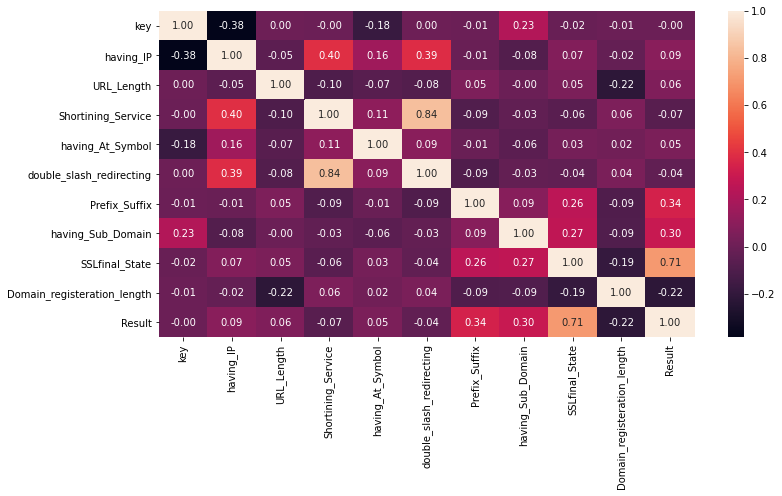

In [10]:
corr_heatmap(data, 0, 10)

<ipython-input-9-6f93ffcb15ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


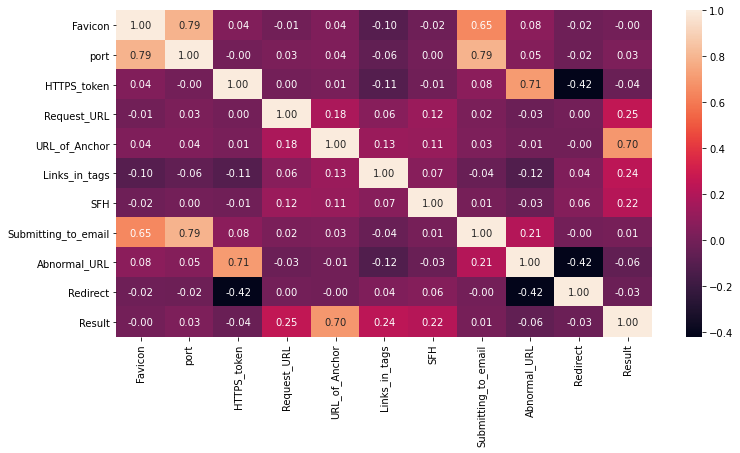

In [11]:
corr_heatmap(data, 10, 20)

<ipython-input-9-6f93ffcb15ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


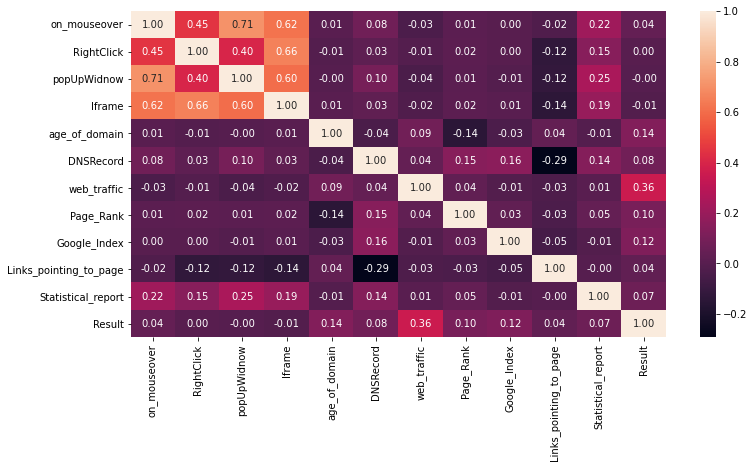

In [12]:
corr_heatmap(data, 20, 31)

# Mutual Info
### We will use mutual info classifier to find non linear and linear correlation betweem the features and labels

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
X = data.drop(['key', 'Result'], axis=1)
y = data['Result']

In [15]:
discrete_features = X.dtypes == int

## Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

In [16]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

SSLfinal_State                 0.343405
URL_of_Anchor                  0.333996
Prefix_Suffix                  0.084016
web_traffic                    0.083597
having_Sub_Domain              0.076922
Request_URL                    0.032555
Links_in_tags                  0.030083
SFH                            0.025282
Domain_registeration_length    0.024174
age_of_domain                  0.009163
Google_Index                   0.007371
Page_Rank                      0.005369
having_IP                      0.004408
Links_pointing_to_page         0.003477
DNSRecord                      0.003344
URL_Length                     0.002754
Statistical_report             0.002295
Shortining_Service             0.002226
Abnormal_URL                   0.001815
having_At_Symbol               0.001244
on_mouseover                   0.000884
double_slash_redirecting       0.000719
HTTPS_token                    0.000673
port                           0.000574
Redirect                       0.000368


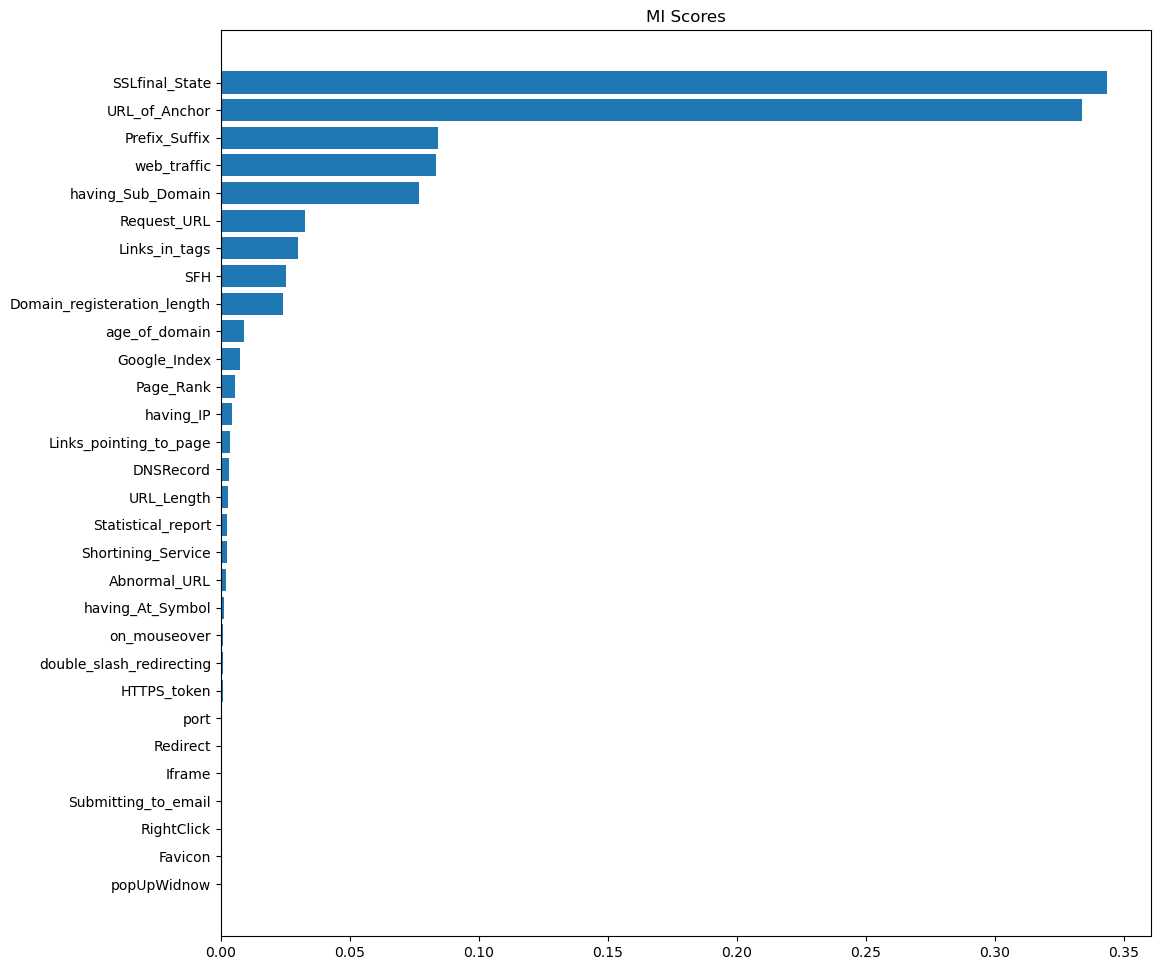

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Prediction
## We will first use logistic regression as for baseline, then try to beat the baseline using random forest classifer

### Our evaluation metrics will be accuracy, precision, recall and f1 score

### Below we import all the required modules

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as cuRfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['Result']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [20]:
arr = []
for i in range(20,33,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9164237123420796, recall : 0.9496475327291037, f1 score : 0.9327398615232443, accuracy : 0.9240647682858738
Performance for Logistic Model with Top 21 features is precision : 0.9374407582938389, recall : 0.9464114832535885, f1 score : 0.9419047619047618, accuracy : 0.9318816303740927
Performance for Logistic Model with Top 22 features is precision : 0.9187380497131931, recall : 0.9629258517034068, f1 score : 0.9403131115459883, accuracy : 0.9318816303740927
Performance for Logistic Model with Top 23 features is precision : 0.9190523198420533, recall : 0.9432624113475178, f1 score : 0.9309999999999999, accuracy : 0.9229480737018425
Performance for Logistic Model with Top 24 features is precision : 0.9139784946236559, recall : 0.9570112589559877, f1 score : 0.9349999999999999, accuracy : 0.9274148520379676
Performance for Logistic Model with Top 25 features is precision : 0.924924924924925, recall : 0.9496402877697842, 

In [21]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.916424,0.949648,0.932740,0.924065
1,21,0.937441,0.946411,0.941905,0.931882
2,22,0.918738,0.962926,0.940313,0.931882
3,23,0.919052,0.943262,0.931000,0.922948
4,24,0.913978,0.957011,0.935000,0.927415
5,25,0.924925,0.949640,0.937120,0.930765
6,26,0.919574,0.949950,0.934515,0.925740
7,27,0.928225,0.946588,0.937316,0.928532
8,28,0.912331,0.944167,0.927976,0.917923
9,29,0.918386,0.940442,0.929283,0.916806


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

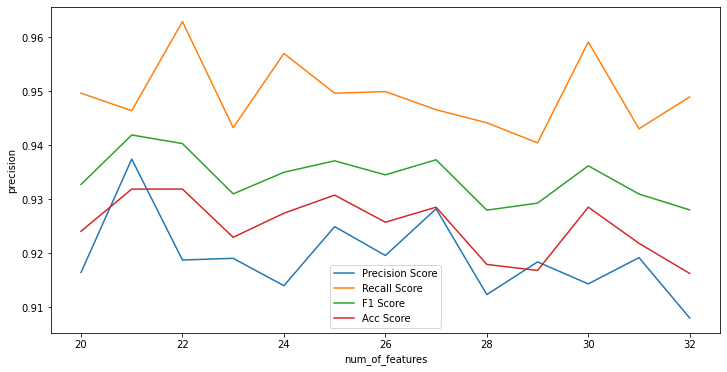

In [22]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

### Training Random Forest Classifier 
### It is the same method as logistic reg, the only diff is that we are now using random forest classifier for training and trying to beat the logistic baseline

In [23]:
rand_clf = cuRfc(random_state=6)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
rand_clf.fit( X_train,y_train)

RandomForestClassifier(random_state=6)

In [25]:
rand_clf.score(X_test,y_test)

0.9715242881072027

##  HyperParameter Tuning Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['sqrt','log2']
}

In [27]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [28]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=90;, score=0.956 total time=   0.6s
[CV 2/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=90;, score=0.962 total time=   1.3s
[CV 3/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=90;, score=0.960 total time=   0.5s
[CV 4/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=90;, score=0.967 total time=   0.5s
[CV 5/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=90;, score=0.966 total time=   0.7s
[CV 1/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.957 total time=   0.9s
[CV 2/5] END criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [29]:
#let's see the best parameters as per our grid search
print('Best parameters: %s' % grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 90}


In [39]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['Result']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = cuRfc(criterion='entropy', 
                max_features='log2',
                min_samples_leaf= 1, 
                min_samples_split= 4, 
                n_estimators=90)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [40]:
arr = []
for i in range(20,32,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision : 0.9605911330049262, recall : 0.9730538922155688, f1 score : 0.9667823500247894, accuracy : 0.9625907314349526
Performance for RFC Model with Top 21 features is precision : 0.9558117195004803, recall : 0.9764474975466143, f1 score : 0.9660194174757281, accuracy : 0.9609156895589056
Performance for RFC Model with Top 22 features is precision : 0.9537688442211055, recall : 0.9723360655737705, f1 score : 0.962962962962963, accuracy : 0.9592406476828588
Performance for RFC Model with Top 23 features is precision : 0.9639024390243902, recall : 0.9772502472799208, f1 score : 0.9705304518664046, accuracy : 0.966499162479062
Performance for RFC Model with Top 24 features is precision : 0.9627450980392157, recall : 0.982, f1 score : 0.9722772277227723, accuracy : 0.9687325516471245
Performance for RFC Model with Top 25 features is precision : 0.971540726202159, recall : 0.9753694581280788, f1 score : 0.9734513274336284, accuracy : 0.9

In [41]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.960591,0.973054,0.966782,0.962591
1,21,0.955812,0.976447,0.966019,0.960916
2,22,0.953769,0.972336,0.962963,0.959241
3,23,0.963902,0.977250,0.970530,0.966499
4,24,0.962745,0.982000,0.972277,0.968733


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

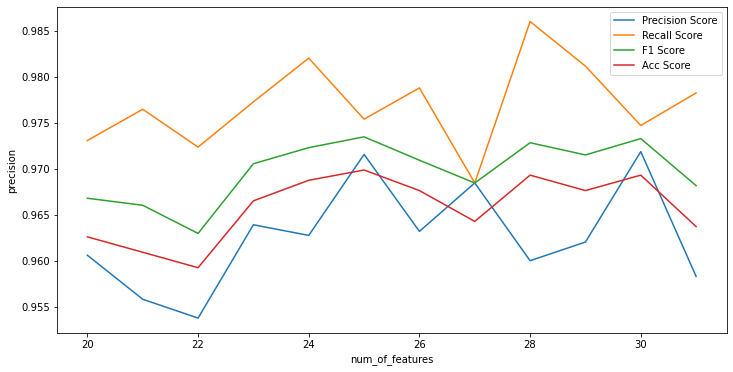

In [42]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [43]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
rfc = cuRfc(criterion='entropy', 
                max_features='log2',
                min_samples_leaf= 1, 
                min_samples_split= 4, 
                n_estimators=90)
    

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

Performance for RFC Model with Top 27 features is precision : 0.9672131147540983, recall : 0.9833333333333333, f1 score : 0.9752066115702478, accuracy : 0.9715242881072027


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       771
           1       0.97      0.98      0.98      1020

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



In [45]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
target=testdata[top_n_features]

prediction=rfc.predict(target)
print(prediction)

[ 1 -1 -1 ... -1  1  1]


In [46]:
from sklearn import metrics
target= pd.DataFrame(testdata.iloc[:,:1].values, columns=['key'])
pred = pd.DataFrame(prediction, columns=['Result'])
pred_data = pd.DataFrame()
pred_data = pd.concat([target, pred], axis=1) #axis=1 to join columns.
print(pred_data)

        key  Result
0     21338       1
1     21339      -1
2     21340      -1
3     21341      -1
4     21342       1
...     ...     ...
2095  23433       1
2096  23434       1
2097  23435      -1
2098  23436       1
2099  23437       1

[2100 rows x 2 columns]


In [48]:
pred_data.to_csv('pdcurfc.csv', index=False) 


## Using XGBoost Classifier to Imporve our accuracy

In [79]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [82]:
X = data.drop(['key', 'Result'], axis=1)
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier(n_estimators=1000,colsample_bytree=0.9)

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.60%


In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       764
           1       0.98      0.98      0.98      1027

    accuracy                           0.98      1791
   macro avg       0.98      0.98      0.98      1791
weighted avg       0.98      0.98      0.98      1791



In [141]:
target=testdata.iloc[:,1:31]

predictionxgb=model.predict(target)
print(predictionxgb)

[ 1 -1 -1 ... -1  1  1]


In [142]:
from sklearn import metrics
target= pd.DataFrame(testdata.iloc[:,:1].values, columns=['key'])
pred = pd.DataFrame(predictionxgb, columns=['Result'])
pred_data = pd.DataFrame()
pred_data = pd.concat([target, pred], axis=1) #axis=1 to join columns.
print(pred_data)

        key  Result
0     21338       1
1     21339      -1
2     21340      -1
3     21341      -1
4     21342       1
...     ...     ...
2095  23433       1
2096  23434       1
2097  23435      -1
2098  23436       1
2099  23437       1

[2100 rows x 2 columns]


In [143]:
pred_data.to_csv('pdxgbfin.csv', index=False) 


In [144]:
df =pd.read_csv("pdxgbfin.csv")
df

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1
